In [42]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [43]:
univariate = '/Group20/Regression/UnivariateData/20.csv'
multivariate = '/Group20/Regression/BivariateData/20.csv'

## Regression on 1-D (Univaraite) input data

In [44]:
df_univ = pd.read_csv(os.getcwd() + univariate, header=None)
df_univ.head()

,0,1
0,0.962,2.9250
1,0.784,2.3300
2,0.992,3.0094
3,0.604,2.1534
4,0.066,1.9694


In [45]:
df_univ_train, df_univ_test = train_test_split(df_univ, test_size=0.3, train_size=0.7, shuffle=False)

In [46]:
df_univ_test.index

Int64Index([ 700,  701,  702,  703,  704,  705,  706,  707,  708,  709,
            ...
             991,  992,  993,  994,  995,  996,  997,  998,  999, 1000],
           dtype='int64', length=301)

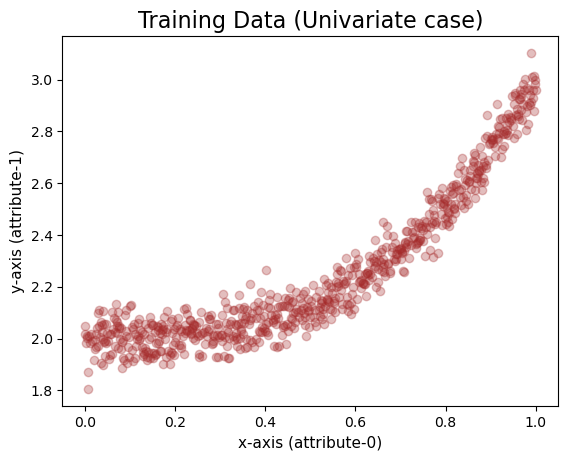

In [47]:
# plotting training data
plt.scatter(df_univ_train[0].values, df_univ_train[1].values, marker='o', c='brown', alpha=0.3)
plt.title('Training Data (Univariate case)', fontsize=16)
plt.xlabel('x-axis (attribute-0)', fontsize=11)
plt.ylabel('y-axis (attribute-1)', fontsize=11)
plt.show()

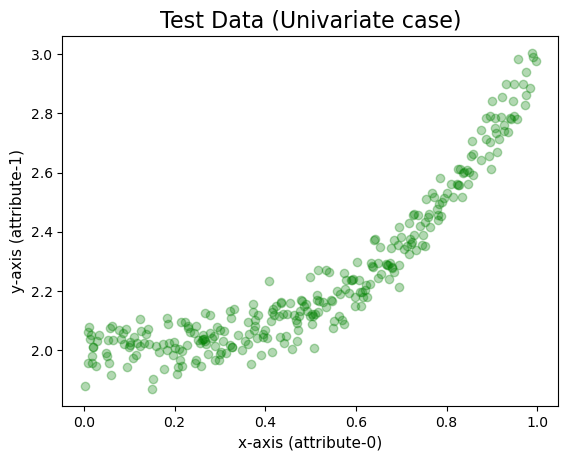

In [48]:
# plotting test data
plt.scatter(df_univ_test[0].values, df_univ_test[1].values, marker='o', c='g', alpha=0.3)
plt.title('Test Data (Univariate case)', fontsize=16)
plt.xlabel('x-axis (attribute-0)', fontsize=11)
plt.ylabel('y-axis (attribute-1)', fontsize=11)
plt.show()

In [49]:
x_train_univ = df_univ_train[0].values
y_train_univ = df_univ_train[1].values
# print(x_train_univ.shape)
# print(y_train_univ.shape)

In [50]:
x_test_univ = df_univ_test[0].values
y_test_univ = df_univ_test[1].values
# print(x_test_univ.shape)
# print(y_test_univ.shape)

In [51]:
def regression(x_train, y_train, n_epochs = 1000, lr=1):
    x = x_train.copy()
    ones = np.ones((len(x),1))
    x = np.hstack((ones,x)) # augmentation
    dim = x.shape[1]
    avg_err = [] # stores avg_error of each epoch
    weights = np.random.rand(dim)*(x.max(axis=0) - x.min(axis=0))
    for epoch in range(1,n_epochs+1,1):
        lr = 1/(epoch)
#         np.random.shuffle(x)
        err = 0
        for i in range(len(x)):
            s_n = np.sum(weights*x[i])
            ins_err = np.square(y_train[i] - s_n)/2
            delta_wt = lr*(y_train[i] - s_n)*x[i]
            weights = weights + delta_wt
            err = err + ins_err
        avg_err.append(err/len(x))
    return weights, avg_err

In [52]:
def prediction(x_test,y_act,weights):
    x = x_test.copy()
    ones = np.ones((len(x),1))
    x = np.hstack((ones,x)) # augmentation
    y_pred = np.sum(weights*x, axis=1)
    return y_pred

In [53]:
def MSE(y_pred, y_act):
    mse = (np.sum(np.square(y_pred-y_act)))/len(y_pred)
    return mse

In [54]:
w1, err1 = regression(x_train_univ.reshape(-1,1),y_train_univ)
print("\nThe value of weights and baises for univariate model")
print(w1)


The value of weights and baises for univariate model
[1.80444794 0.90023012]


In [55]:
len(err1)

1000

In [56]:
a1 = x_train_univ.reshape(-1,1)
# a1.max(axis=0) - 
# a1.min(axis=0)
np.random.rand(2)

array([0.20237057, 0.87045813])

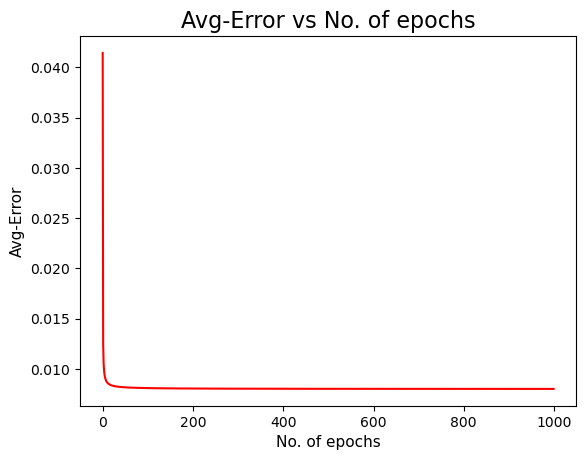

In [57]:
x_vals = np.arange(len(err1))
plt.plot(x_vals,err1, c='r')
plt.title("Avg-Error vs No. of epochs", fontsize=16)
plt.ylabel("Avg-Error", fontsize=11)
plt.xlabel('No. of epochs', fontsize=11)
plt.show()

In [58]:
err1

[0.04142969615487539,
 0.012544317606942261,
 0.010608206692057452,
 0.009857250707407518,
 0.009445019556621017,
 0.009185465746343041,
 0.009007941678523224,
 0.00887928018919558,
 0.00878187539753544,
 0.008705570260168426,
 0.00864412981500957,
 0.008593534166665287,
 0.008551085096931426,
 0.008514909253236643,
 0.008483667896155192,
 0.008456380150228657,
 0.008432311482552567,
 0.008410901135268668,
 0.008391713613452955,
 0.00837440547202273,
 0.008358702089682646,
 0.008344381115368388,
 0.008331260466251177,
 0.008319189489119534,
 0.008308042357868627,
 0.008297713076197416,
 0.008288111649020206,
 0.008279161115955882,
 0.008270795228443486,
 0.008262956612833364,
 0.008255595304309445,
 0.008248667566599331,
 0.008242134934000516,
 0.008235963427881295,
 0.008230122911260684,
 0.0082245865535321,
 0.00821933038371113,
 0.008214332915339252,
 0.008209574829784044,
 0.008205038707435762,
 0.00820070879842792,
 0.008196570826161745,
 0.008192611818205926,
 0.00818881996015988

In [59]:
y_pred_univ_train = prediction(x_train_univ.reshape(-1,1),y_train_univ,w1)
mse_univ = MSE(y_pred_univ_train,y_train_univ)
print('\nFor Univariate training data:')
print(f'Mean Squared error is {mse_univ :.3f}')
print(f'Root-Mean Squared error is {np.sqrt(mse_univ) :.3f}')


For Univariate training data:
Mean Squared error is 0.016
Root-Mean Squared error is 0.126


In [60]:
y_pred_univ_test = prediction(x_test_univ.reshape(-1,1),y_test_univ,w1)
mse_univ_t = MSE(y_pred_univ_test,y_test_univ)
print('\nFor Univariate test data:')
print(f'Mean Squared error is {mse_univ_t :.3f}')
print(f'Root-Mean Squared error is {np.sqrt(mse_univ_t) :.3f}')


For Univariate test data:
Mean Squared error is 0.015
Root-Mean Squared error is 0.120


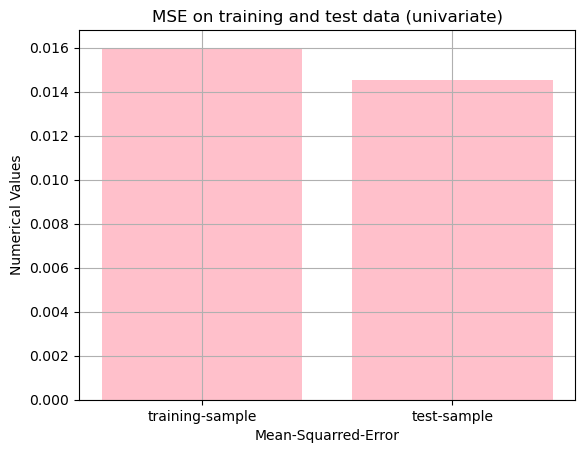

In [61]:
# Plots of the values of mean squared error (MSE) on training data and test data.
mse_arr_univ = [mse_univ, mse_univ_t]
mse_val_univ = ["training-sample", "test-sample"]
fig = plt.figure()
plt.bar(mse_val_univ, mse_arr_univ, color ='pink')
plt.xlabel("Mean-Squarred-Error")
plt.ylabel("Numerical Values")
plt.title("MSE on training and test data (univariate)")
plt.grid(zorder=3)
plt.show()

### plotting regression line

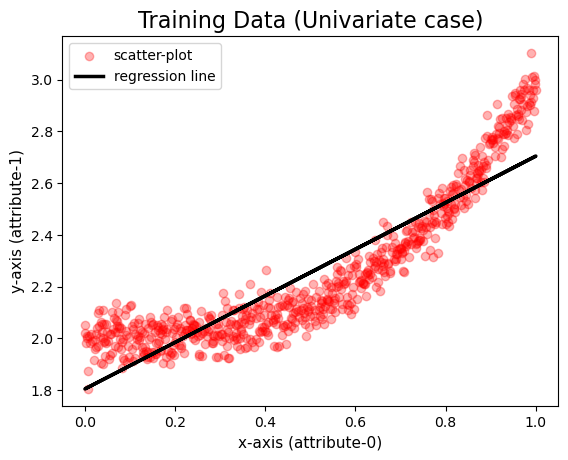

In [62]:
# plotting regression line
xseq = np.linspace(int(np.min(x_train_univ)), int(np.max(x_train_univ) + 1), 100)
plt.scatter(df_univ_train[0].values, df_univ_train[1].values, marker='o', c='r', alpha=0.3, label="scatter-plot")
plt.plot(x_train_univ, w1[0] + w1[1]*x_train_univ, color="k", lw=2.5, label="regression line")
plt.title('Training Data (Univariate case)', fontsize=16)
plt.xlabel('x-axis (attribute-0)', fontsize=11)
plt.ylabel('y-axis (attribute-1)', fontsize=11)
plt.legend()
plt.show()

### Plots of model output and target output for training data and test data


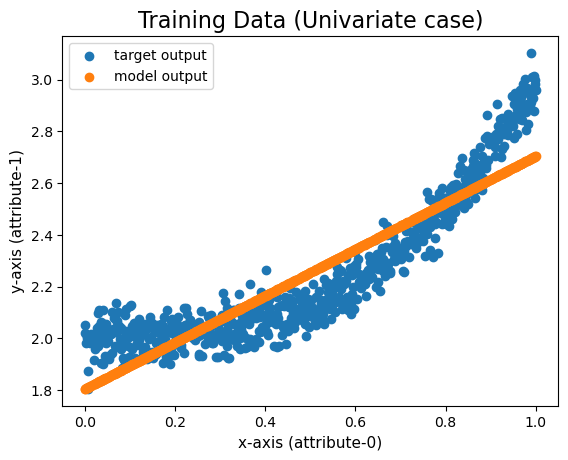

In [63]:
# For training data
plt.scatter(x_train_univ, y_train_univ, label = 'target output')
plt.scatter(x_train_univ, y_pred_univ_train, label='model output')
plt.title('Training Data (Univariate case)', fontsize=16)
plt.xlabel('x-axis (attribute-0)', fontsize=11)
plt.ylabel('y-axis (attribute-1)', fontsize=11)
plt.legend()
plt.show()

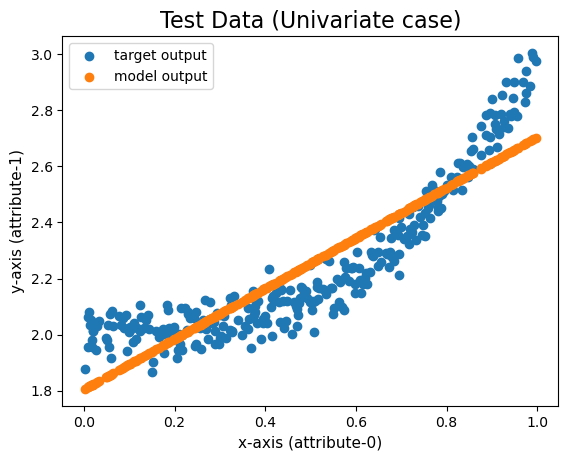

In [64]:
# For test data
plt.scatter(x_test_univ, y_test_univ, label = 'target output')
plt.scatter(x_test_univ, y_pred_univ_test, label='model output')
plt.title('Test Data (Univariate case)', fontsize=16)
plt.xlabel('x-axis (attribute-0)', fontsize=11)
plt.ylabel('y-axis (attribute-1)', fontsize=11)
plt.legend()
plt.show()

### Scatter plot with target output on x-axis and model output on y-axis, for training data and test data.

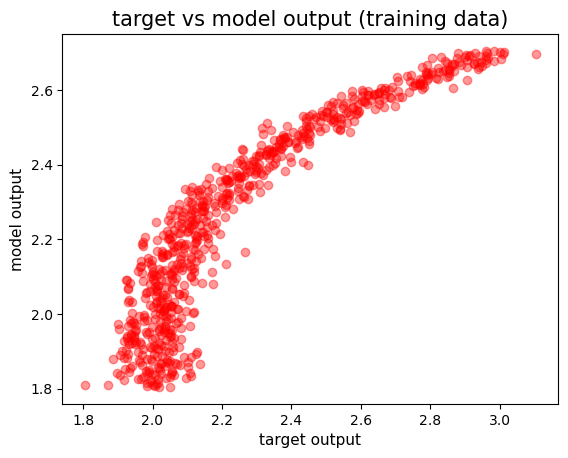

In [65]:
# For Training data
plt.scatter(y_train_univ,y_pred_univ_train, alpha=0.4, c='red')
plt.title("target vs model output (training data)", fontsize=15)
plt.xlabel("target output", fontsize=11)
plt.ylabel("model output", fontsize=11)
plt.show()

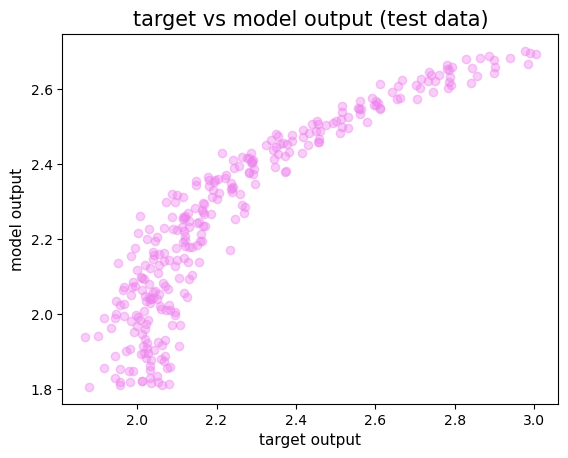

In [66]:
# For Test data
plt.scatter(y_test_univ,y_pred_univ_test, alpha=0.4, c='violet')
plt.title("target vs model output (test data)", fontsize=15)
plt.xlabel("target output", fontsize=11)
plt.ylabel("model output", fontsize=11)
plt.show()

## Regression on 2-D (Bivaraite) input data

In [67]:
df_biv = pd.read_csv(os.getcwd() + multivariate, header=None)
df_biv.head()

,0,1,2
0,0.46,1.00,-5.970800
1,0.07,0.20,3.331600
2,0.65,0.52,-3.442800
3,0.21,0.52,-0.001112
4,0.22,1.00,-1.201900


In [68]:
df_biv_train, df_biv_test = train_test_split(df_biv, test_size=0.3, train_size=0.7, shuffle=False)

In [69]:
x_train_biv = df_biv_train[[0,1]].values
y_train_biv = df_biv_train[2].values
# print(x_train_biv.shape)
# print(y_train_biv.shape)

In [70]:
x_test_biv = df_biv_test[[0,1]].values
y_test_biv = df_biv_test[2].values
# print(x_test_biv.shape)
# print(y_test_biv.shape)

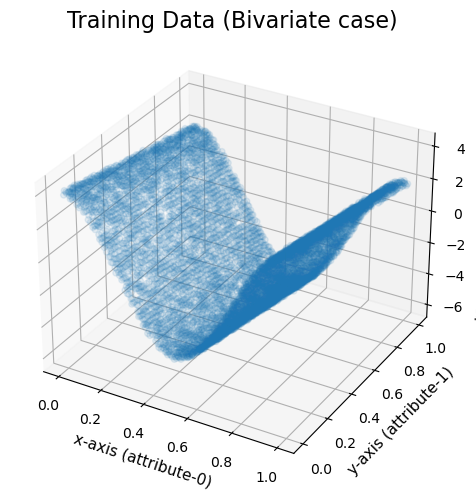

In [71]:
# plotting training data
fig = plt.figure(constrained_layout=True)
ax = plt.axes(projection='3d')
ax.scatter3D(x_train_biv[:,0], x_train_biv[:,1], y_train_biv, alpha=0.1)
plt.title('Training Data (Bivariate case)', fontsize=16)
ax.set_xlabel('x-axis (attribute-0)', fontsize=11)
ax.set_ylabel('y-axis (attribute-1)', fontsize=11)
ax.set_zlabel('target-output (attribute-2)', fontsize=11)
plt.show()


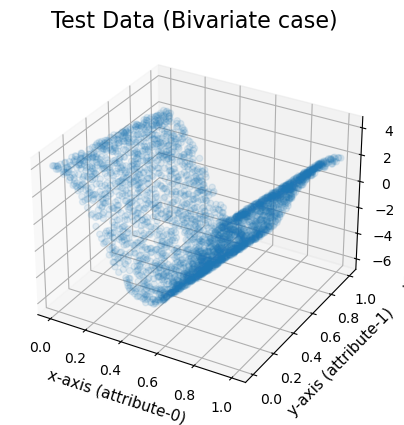

In [72]:
# plotting test data
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.scatter3D(x_test_biv[:,0], x_test_biv[:,1], y_test_biv, alpha=0.1)
plt.title('Test Data (Bivariate case)', fontsize=16)
ax.set_xlabel('x-axis (attribute-0)', fontsize=11)
ax.set_ylabel('y-axis (attribute-1)', fontsize=11)
ax.set_zlabel('target-output (attribute-2)', fontsize=11)
plt.show()

In [73]:
# Using Model
w_bi, err_bi = regression(x_train_biv,y_train_biv)
print("\nThe value of weights and biases for bivariate regression model:")
print(w_bi)


The value of weights and biases for bivariate regression model:
[ 0.11767659  0.04420203 -2.05969383]


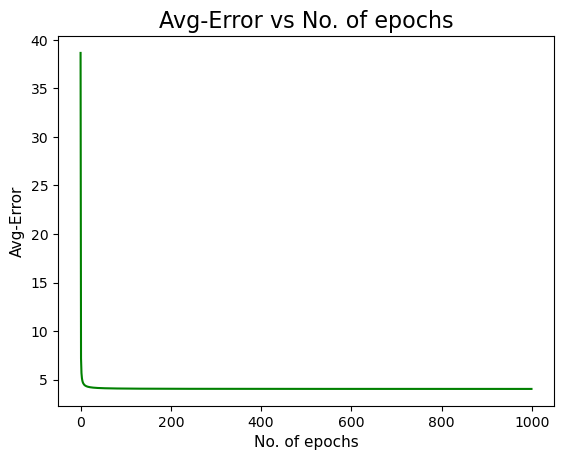

In [74]:
x_vals = np.arange(len(err_bi))
plt.plot(x_vals,err_bi, c='g')
plt.title("Avg-Error vs No. of epochs", fontsize=16)
plt.ylabel("Avg-Error", fontsize=11)
plt.xlabel('No. of epochs', fontsize=11)
plt.show()

In [75]:
err_bi

[38.64932381222848,
 7.180302406224073,
 5.672734731068824,
 5.14890153862763,
 4.882000101170671,
 4.720396662430273,
 4.612020885300635,
 4.534240896551386,
 4.475651362793995,
 4.429884894000576,
 4.393109230227515,
 4.362881258566756,
 4.337570815145589,
 4.316049022955858,
 4.297509572562748,
 4.28136122712435,
 4.267160544709159,
 4.2545683272322385,
 4.243320596700037,
 4.233208754811675,
 4.224065711714327,
 4.21575599133237,
 4.208168544685605,
 4.201211444168447,
 4.194807908003483,
 4.188893280884252,
 4.183412712343457,
 4.178319351296236,
 4.173572927312069,
 4.169138625034224,
 4.164986183221663,
 4.1610891676363035,
 4.157424379730404,
 4.153971372336324,
 4.150712050347652,
 4.147630339419699,
 4.14471190949097,
 4.141943942781796,
 4.139314938103494,
 4.136814544985664,
 4.134433422426105,
 4.132163118080661,
 4.129995964505008,
 4.12792498968994,
 4.125943839631808,
 4.124046711079923,
 4.122228292925065,
 4.120483714953736,
 4.118808502904153,
 4.117198538933284,
 4.

In [76]:
y_pred_biv_train = prediction(x_train_biv, y_train_biv,w_bi)
mse_biv = MSE(y_pred_biv_train,y_train_biv) #training data
print('\nFor Bivariate training data:')
print(f'Mean Squared error is {mse_biv :.3f}')
print(f'Root-Mean Squared error is {np.sqrt(mse_biv) :.3f}')


For Bivariate training data:
Mean Squared error is 8.076
Root-Mean Squared error is 2.842


In [77]:
y_pred_biv_test = prediction(x_test_biv, y_test_biv,w_bi)
mse_biv_t = MSE(y_pred_biv_test,y_test_biv) #test data
print('\nFor Bivariate test data:')
print(f'Mean Squared error is {mse_biv_t :.3f}')
print(f'Root-Mean Squared error is {np.sqrt(mse_biv_t) :.3f}')


For Bivariate test data:
Mean Squared error is 8.107
Root-Mean Squared error is 2.847


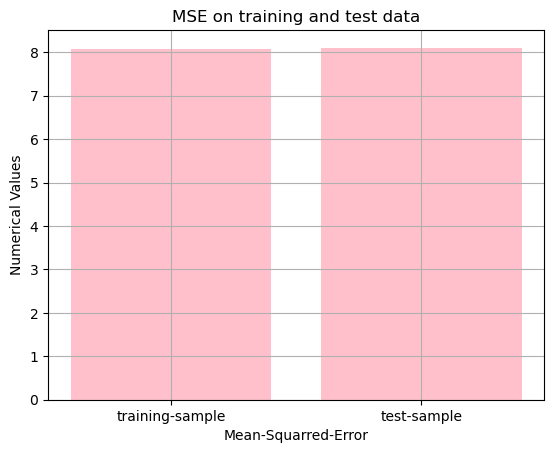

In [78]:
# Plots of the values of mean squared error (MSE) on training data and test data.
mse_arr = [mse_biv, mse_biv_t]
mse_val = ["training-sample", "test-sample"]
fig = plt.figure()
plt.bar(mse_val, mse_arr, color ='pink')
plt.xlabel("Mean-Squarred-Error")
plt.ylabel("Numerical Values")
plt.title("MSE on training and test data")
plt.grid(zorder=3)
plt.show()

### Plots of model output and target output for training data and test data


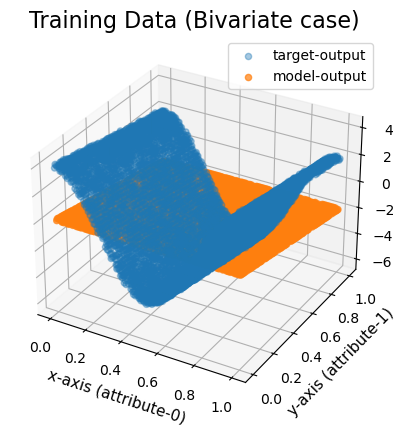

In [79]:
# For training data
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.scatter3D(x_train_biv[:,0], x_train_biv[:,1], y_train_biv, alpha=0.4, label="target-output")
ax.scatter3D(x_train_biv[:,0], x_train_biv[:,1], y_pred_biv_train, alpha=0.7, label="model-output")
plt.title('Training Data (Bivariate case)', fontsize=16)
ax.set_xlabel('x-axis (attribute-0)', fontsize=11)
ax.set_ylabel('y-axis (attribute-1)', fontsize=11)
ax.set_zlabel('output (attribute-2)', fontsize=11)
plt.legend()
plt.show()

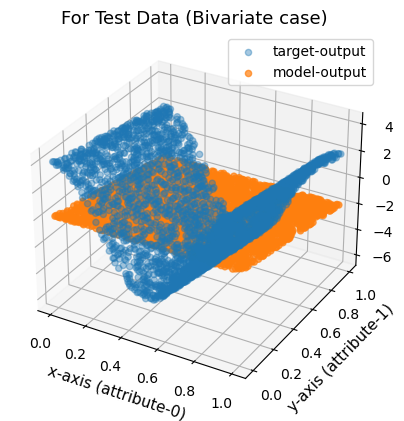

In [80]:
# For test data
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.scatter3D(x_test_biv[:,0], x_test_biv[:,1], y_test_biv, alpha=0.4, label="target-output")
ax.scatter3D(x_test_biv[:,0], x_test_biv[:,1], y_pred_biv_test, alpha=0.7, label="model-output")
plt.title('For Test Data (Bivariate case)', fontsize=13)
ax.set_xlabel('x-axis (attribute-0)', fontsize=11)
ax.set_ylabel('y-axis (attribute-1)', fontsize=11)
ax.set_zlabel('output (attribute-2)', fontsize=11)
plt.legend()
plt.show()

### Scatter plot with target output on x-axis and model output on y-axis, for training data and test data.

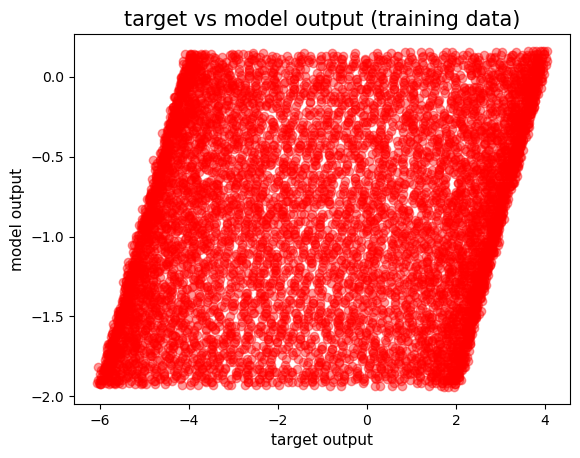

In [81]:
# For Training data
plt.scatter(y_train_biv,y_pred_biv_train, alpha=0.4, c='red')
plt.title("target vs model output (training data)", fontsize=15)
plt.xlabel("target output", fontsize=11)
plt.ylabel("model output", fontsize=11)
plt.show()

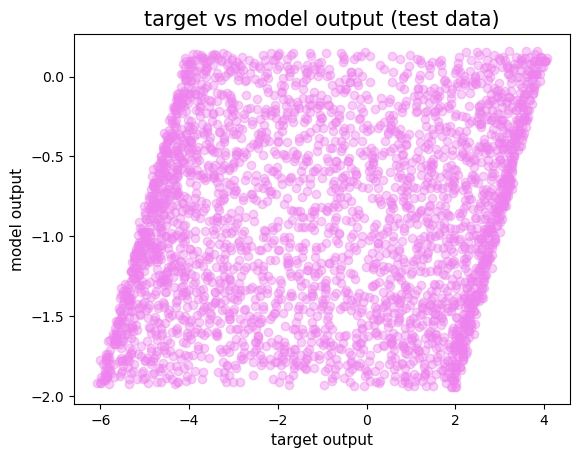

In [82]:
# For Test data
plt.scatter(y_test_biv,y_pred_biv_test, alpha=0.4, c='violet')
plt.title("target vs model output (test data)", fontsize=15)
plt.xlabel("target output", fontsize=11)
plt.ylabel("model output", fontsize=11)
plt.show()